In [2]:
import torch 

In [8]:
a=[[i,i+1,i+2] for i in range(10)]
b=[[i%2,i+2] for i in range(10)]
a=torch.tensor(a)
b=torch.tensor(b)
print(a.shape)
print(a)
a=a.view(1,10,3)
print(a)

torch.Size([10, 3])
tensor([[ 0,  1,  2],
        [ 1,  2,  3],
        [ 2,  3,  4],
        [ 3,  4,  5],
        [ 4,  5,  6],
        [ 5,  6,  7],
        [ 6,  7,  8],
        [ 7,  8,  9],
        [ 8,  9, 10],
        [ 9, 10, 11]])
tensor([[[ 0,  1,  2],
         [ 1,  2,  3],
         [ 2,  3,  4],
         [ 3,  4,  5],
         [ 4,  5,  6],
         [ 5,  6,  7],
         [ 6,  7,  8],
         [ 7,  8,  9],
         [ 8,  9, 10],
         [ 9, 10, 11]]])


In [10]:
#random
a=torch.rand(1,10,3)
a

tensor([[[0.9447, 0.9035, 0.9927],
         [0.9694, 0.4057, 0.4255],
         [0.8335, 0.2373, 0.9908],
         [0.2727, 0.8594, 0.2096],
         [0.5652, 0.2181, 0.3472],
         [0.6637, 0.9182, 0.5410],
         [0.6776, 0.8474, 0.1953],
         [0.8824, 0.2959, 0.8853],
         [0.2789, 0.1726, 0.0513],
         [0.2846, 0.3952, 0.7589]]])

In [11]:
torch.cuda.is_available()

False

WEATHER DATASET AUS

In [3]:
import pandas as pd
df=pd.read_csv("D:\ALL CODES\ML NEW\DATASETS FOR FUN\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
cols=['Rainfall','Humidity3pm','Pressure9am','RainToday','RainTomorrow']
df=df[cols]
df['RainToday']=df['RainToday'].map({'No':0,'Yes':1})
df['RainTomorrow']=df['RainTomorrow'].map({'No':0,'Yes':1})
df.dropna(inplace=True)

In [8]:
df['RainTomorrow'].value_counts()/len(df)*100

RainTomorrow
0.0    77.876156
1.0    22.123844
Name: count, dtype: float64

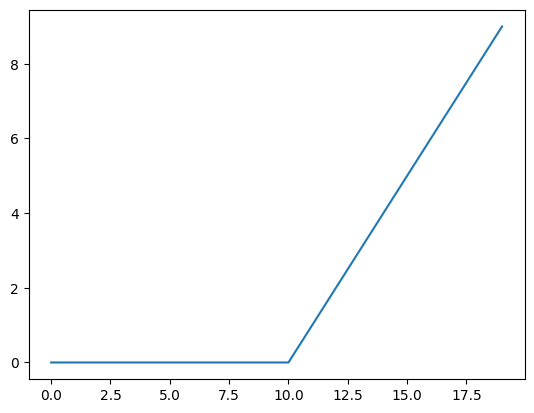

In [12]:
import matplotlib.pyplot as plt
ax=plt.gca()
plt.plot(
    torch.relu(torch.tensor([i for i in range(-10,10)])),
    
)

In [1]:
import torch 
import os 
import numpy as np
import pandas as pd
import tqdm
 

In [7]:
import pandas as pd
data=pd.read_csv('DATASETS FOR FUN\weatherAUS.csv')
cols=['Rainfall','Humidity3pm','Pressure9am','RainToday','RainTomorrow']
data=data[cols]
data.head()

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,No,No
1,0.0,25.0,1010.6,No,No
2,0.0,30.0,1007.6,No,No
3,0.0,16.0,1017.6,No,No
4,1.0,33.0,1010.8,No,No


In [10]:
data.replace({'No':0,'Yes':1},inplace=True)
data.dropna(inplace=True)
data.head()

,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0.0,0.0
1,0.0,25.0,1010.6,0.0,0.0
2,0.0,30.0,1007.6,0.0,0.0
3,0.0,16.0,1017.6,0.0,0.0
4,1.0,33.0,1010.8,0.0,0.0


In [12]:
import seaborn as sns


In [11]:
data['RainTomorrow'].value_counts()

RainTomorrow
0.0    97103
1.0    27586
Name: count, dtype: int64

In [14]:
X=data.drop('RainTomorrow',axis=1)
y=data['RainTomorrow']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train=torch.tensor(X_train.values).float()
X_test=torch.tensor(X_test.values).float()
y_train=torch.tensor(y_train.values).float()
y_test=torch.tensor(y_test.values).float()


In [18]:
from torch import nn
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch import sigmoid

In [22]:
from ann_visualizer.visualize import ann_viz
class Net(torch.nn.Module):
    def __init__(self, n_features):
        super(Net,self).__init__()
        self.fc1=nn.Linear(n_features,5)
        self.fc2=nn.Linear(5,3)
        self.fc3=nn.Linear(3,1)
        
    def forward(self,x):
        x=ReLU(self.fc1(x))
        x=ReLU(self.fc2(x))
        x=ReLU(self.fc3(x))
        x=torch.sigmoid(x)
        
net=Net(X_train.shape[1])


In [28]:
loss=nn.BCELoss()
optimizer=torch.optim.Adam()

In [26]:
3

AttributeError: 'Net' object has no attribute 'layers'